# Covid Vaccination in England by region and age group

In [45]:
import sys
sys.path.append("..")

import pandas as pd
import altair as alt
import data as dt
from dateutil import parser

import seaborn as sns

In [30]:
latest_weekly_date = parser.parse("2021-04-22")
spreadsheet = f"../data/COVID-19-weekly-announced-vaccinations-{latest_weekly_date.strftime('%-d-%B-%Y')}.xlsx"

In [31]:
vaccinations = dt.vaccinations_dataframe(spreadsheet)    
population = dt.population_dataframe(spreadsheet)    
combined = dt.compute_all_vaccination_rates(vaccinations, population)
combined.head()

,LTLA Code,LTLA Name,Under 45,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+
14,E07000032,Amber Valley,20.710925,83.505741,90.6881,90.973661,93.232649,95.570698,96.711963,97.804796,97.197598
15,E07000170,Ashfield,19.840826,70.251111,87.901663,90.642105,91.379967,94.311954,95.65667,96.470588,96.369114
16,E07000171,Bassetlaw,19.617013,73.056929,87.851962,90.432421,92.098765,94.227747,96.442151,96.933875,96.920755
17,E07000129,Blaby,20.70238,77.088552,89.326138,90.098742,92.064951,94.401756,96.67184,97.177513,96.244375
18,E07000033,Bolsover,19.286211,72.523607,87.753264,90.084355,92.479523,93.790341,95.613048,97.542155,97.002794


In [46]:
option = ["Sutton", "South Derbyshire"]

local_area = combined.loc[combined["LTLA Name"].isin(option)].drop(["LTLA Code"], axis=1)
local_area_absolute = vaccinations.loc[vaccinations["LTLA Name"].isin(option)].drop(["LTLA Code"], axis=1)
local_area_population = population.loc[population["LTLA Name"].isin(option)].drop(["LTLA Code"], axis=1)

local_area.rename(columns={"Under 50": "<50"}, inplace=True)
melted_local_area = local_area.melt(value_vars=local_area.columns.drop(["LTLA Name"]), id_vars=["LTLA Name"])
melted_local_area = melted_local_area.rename(columns={"value": "Percentage", "variable": "Age"})    
melted_local_area.reset_index(level=0, inplace=True)
chart = alt.Chart(melted_local_area).mark_bar().encode(
    y=alt.Y('LTLA Name', sort=["index"], axis=alt.Axis(labels=True, ticks=False), title=None),
    x=alt.X('Percentage', scale=alt.Scale(domain=[0, 100])),
    color=alt.Color('LTLA Name', legend=None ),
    row=alt.Row("Age", title=None, sort=["index"]),        
    tooltip=["Age", alt.Tooltip('Percentage', format='.2f')] 
).properties()


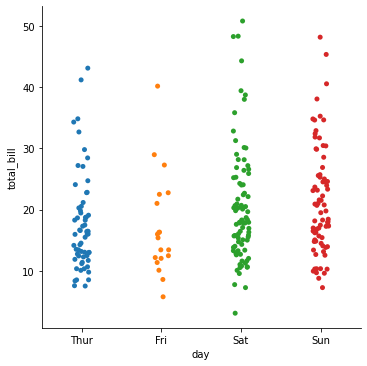

In [47]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips)